### Imports:

In [2]:
import numpy as np
import pandas as pd
import SimpleITK as sitk
import os
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import matplotlib.image as mpimg
from scipy import ndimage
from scipy.stats import gaussian_kde
import seaborn as sns
%matplotlib widget

### Reading Data:

In [3]:
def load_itk_image(filename):
    itkimage = sitk.ReadImage(filename)

    numpyImage = sitk.GetArrayFromImage(itkimage)
    numpyOrigin = np.array(list(reversed(itkimage.GetOrigin())))
    numpySpacing = np.array(list(reversed(itkimage.GetSpacing())))

    return numpyImage, numpyOrigin, numpySpacing

def read_luna_dataset(root_dir):
    Dataset={}
    subsets = [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]

    for subset in subsets:
        mhd_files = [f for f in os.listdir(os.path.join(root_dir, subset)) if f.endswith(".mhd")]
        if subset not in Dataset:
            Dataset[subset] = {}

        for index, file in enumerate(mhd_files):
            Dataset[subset][f"CT_{index}"] = file

    return Dataset


In [4]:
if __name__ == "__main__":
    Data = read_luna_dataset("Data/Luna")

In [5]:
print(Data)

{'subset0': {'CT_0': '1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031515062000744821260.mhd', 'CT_1': '1.3.6.1.4.1.14519.5.2.1.6279.6001.108197895896446896160048741492.mhd', 'CT_2': '1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524522225658609808059.mhd', 'CT_3': '1.3.6.1.4.1.14519.5.2.1.6279.6001.111172165674661221381920536987.mhd', 'CT_4': '1.3.6.1.4.1.14519.5.2.1.6279.6001.122763913896761494371822656720.mhd', 'CT_5': '1.3.6.1.4.1.14519.5.2.1.6279.6001.124154461048929153767743874565.mhd', 'CT_6': '1.3.6.1.4.1.14519.5.2.1.6279.6001.126121460017257137098781143514.mhd', 'CT_7': '1.3.6.1.4.1.14519.5.2.1.6279.6001.126264578931778258890371755354.mhd', 'CT_8': '1.3.6.1.4.1.14519.5.2.1.6279.6001.128023902651233986592378348912.mhd', 'CT_9': '1.3.6.1.4.1.14519.5.2.1.6279.6001.129055977637338639741695800950.mhd', 'CT_10': '1.3.6.1.4.1.14519.5.2.1.6279.6001.130438550890816550994739120843.mhd', 'CT_11': '1.3.6.1.4.1.14519.5.2.1.6279.6001.134996872583497382954024478441.mhd', 'CT_12': '1.3.6.1.4.1.145

In [6]:
def load_csv(filename):
    return pd.read_csv(f"Data/Luna/{filename}")

In [7]:
def basic_statistics(data):
    print("Infos:\n", data.info())
    print("Description:\n", data.describe())
    print("Presence of null values:\n")
    print(data.isnull().sum())

In [8]:
if __name__ == "__main__":
    annotations = load_csv("annotations.csv")
    basic_statistics(annotations)
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   seriesuid    1186 non-null   object 
 1   coordX       1186 non-null   float64
 2   coordY       1186 non-null   float64
 3   coordZ       1186 non-null   float64
 4   diameter_mm  1186 non-null   float64
dtypes: float64(4), object(1)
memory usage: 46.5+ KB
Infos:
 None
Description:
             coordX       coordY       coordZ  diameter_mm
count  1186.000000  1186.000000  1186.000000  1186.000000
mean     -5.067547     8.428113  -160.159029     8.306527
std      84.468115    98.316003   279.829437     4.762033
min    -164.351031  -283.834336  -790.074799     3.253443
25%     -80.909225   -51.549643  -221.197808     5.107177
50%     -32.855132    18.787926  -167.615160     6.433600
75%      76.830069    67.245915  -109.735281     9.696301
max     164.763985   271.405521  1790.494057    32.27003

### Visualize the distribution of nodules on the lungs:

In [9]:
def scatter_2d(data, axis1="coordX", axis2="coordY"):
    """
    Create a 2D scatter plot using selected axes.
    
    Parameters:
    - data: Pandas DataFrame containing 'coordX', 'coordY', and 'coordZ'.
    - axis1: The first coordinate for the x-axis (default: 'coordX').
    - axis2: The second coordinate for the y-axis (default: 'coordY').
    """
    x = data[axis1]
    y = data[axis2]

    # Compute point density
    xy = np.vstack([x, y])
    density = gaussian_kde(xy)(xy)  # Kernel Density Estimation

    # Sort by density so that dense points appear on top
    idx = density.argsort()
    x, y, density = x[idx], y[idx], density[idx]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, c=density, cmap="plasma", s=10, alpha=0.75)

    # Labels
    plt.xlabel(axis1)
    plt.ylabel(axis2)
    plt.title(f"2D Scatter Plot ({axis1} vs {axis2}) with Density Coloring")
    plt.colorbar(label="Density")  # Add a color legend

    plt.show()

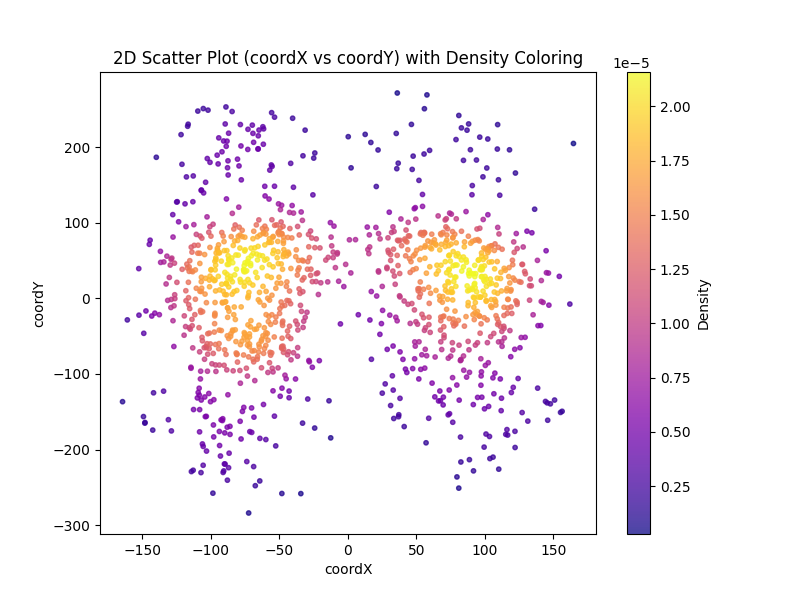

In [10]:
if __name__ == "__main__":
    scatter_2d(annotations)

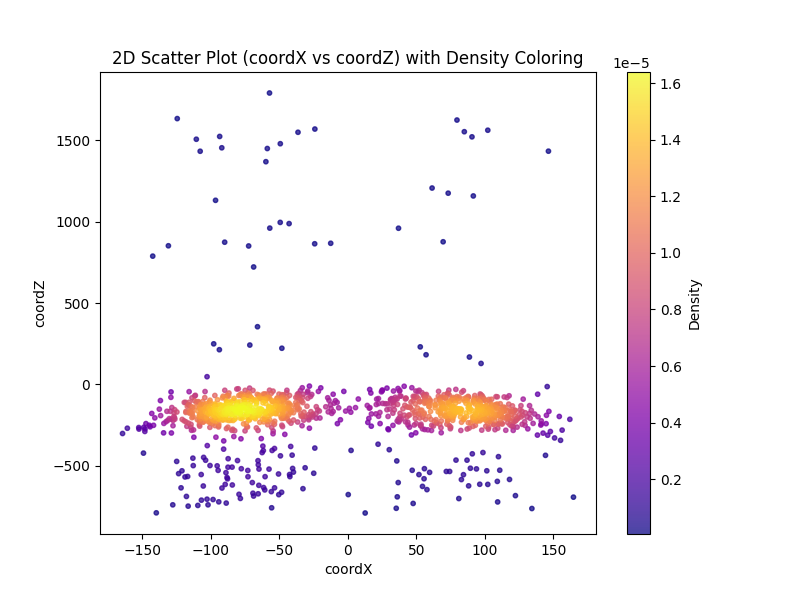

In [11]:
if __name__ == "__main__":
    scatter_2d(annotations, axis2="coordZ")

In [12]:
def scatter_3d(data):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data["coordX"], data["coordY"], data["coordZ"], c='blue', alpha=0.5)
    
    ax.set_xlabel("X Coordinate")
    ax.set_ylabel("Y Coordinate")
    ax.set_zlabel("Z Coordinate")
    ax.set_title("3D Scatter Plot of Nodule Locations")
    plt.show()


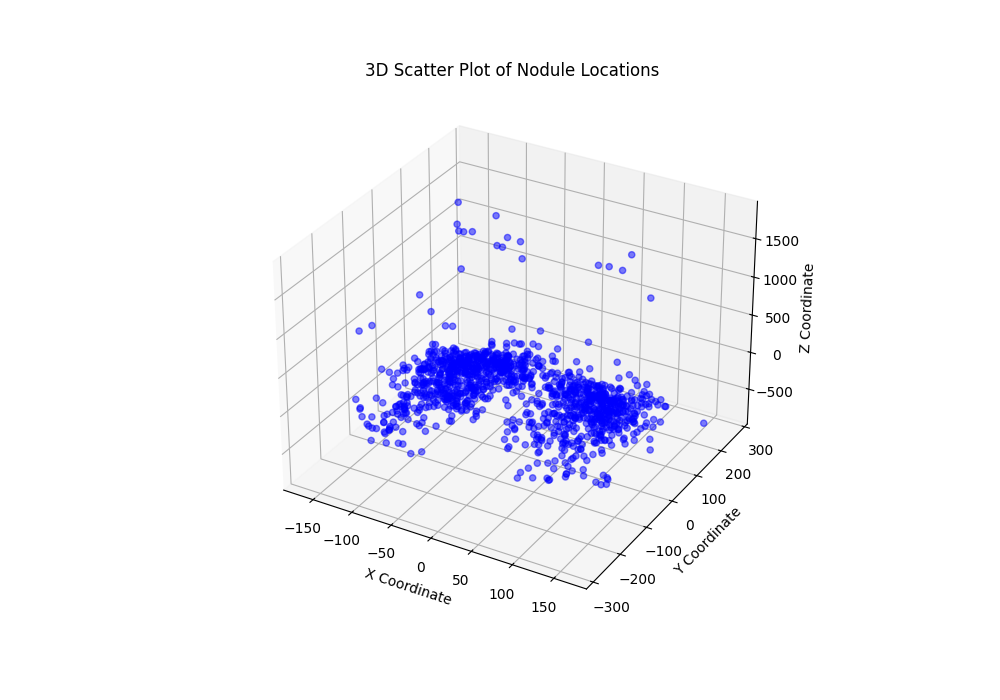

In [13]:
if __name__ == "__main__":
    scatter_3d(annotations)

### Nodule size distribution:

In [14]:
def diameters_hist(data):
    plt.figure(figsize=(8, 5))
    plt.hist(data["diameter_mm"], bins=30, color="skyblue", edgecolor="black")
    plt.xlabel("Diameter (mm)")
    plt.ylabel("Frequency")
    plt.title("Distribution of Nodule Diameters")
    plt.show()


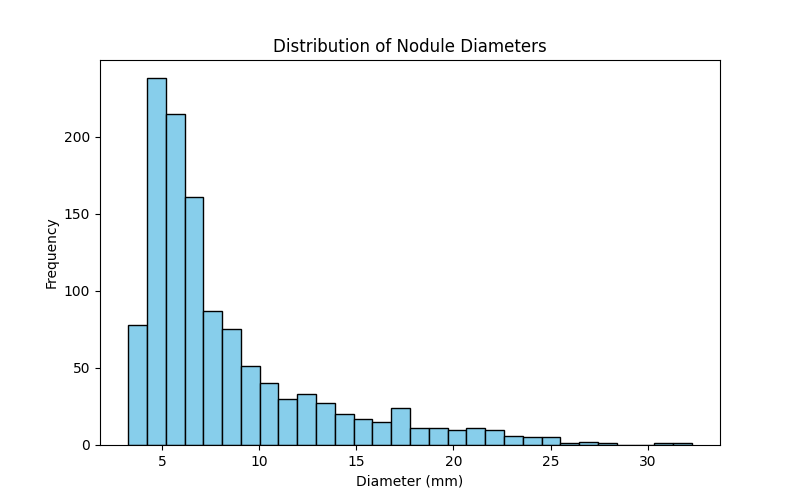

In [15]:
if __name__ == "__main__":
    diameters_hist(annotations)

In [16]:
def boxplot_nodule_size(data):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data["diameter_mm"], color="lightblue")
    plt.xlabel("Nodule Diameter (mm)")
    plt.title("Boxplot of Nodule Sizes")
    plt.show()

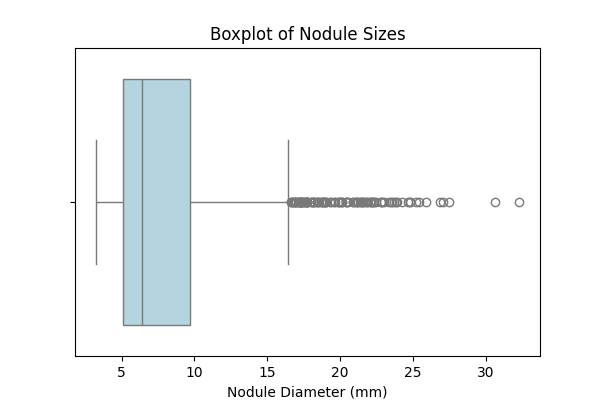

In [17]:
if __name__ == "__main__":
    boxplot_nodule_size(annotations)

In [18]:
def pairplot_annotations(data):
    import seaborn as sns
    sns.pairplot(data, diag_kind="kde", corner=True)
    plt.suptitle("Pairplot of Nodule Features", y=1.02)
    plt.show()

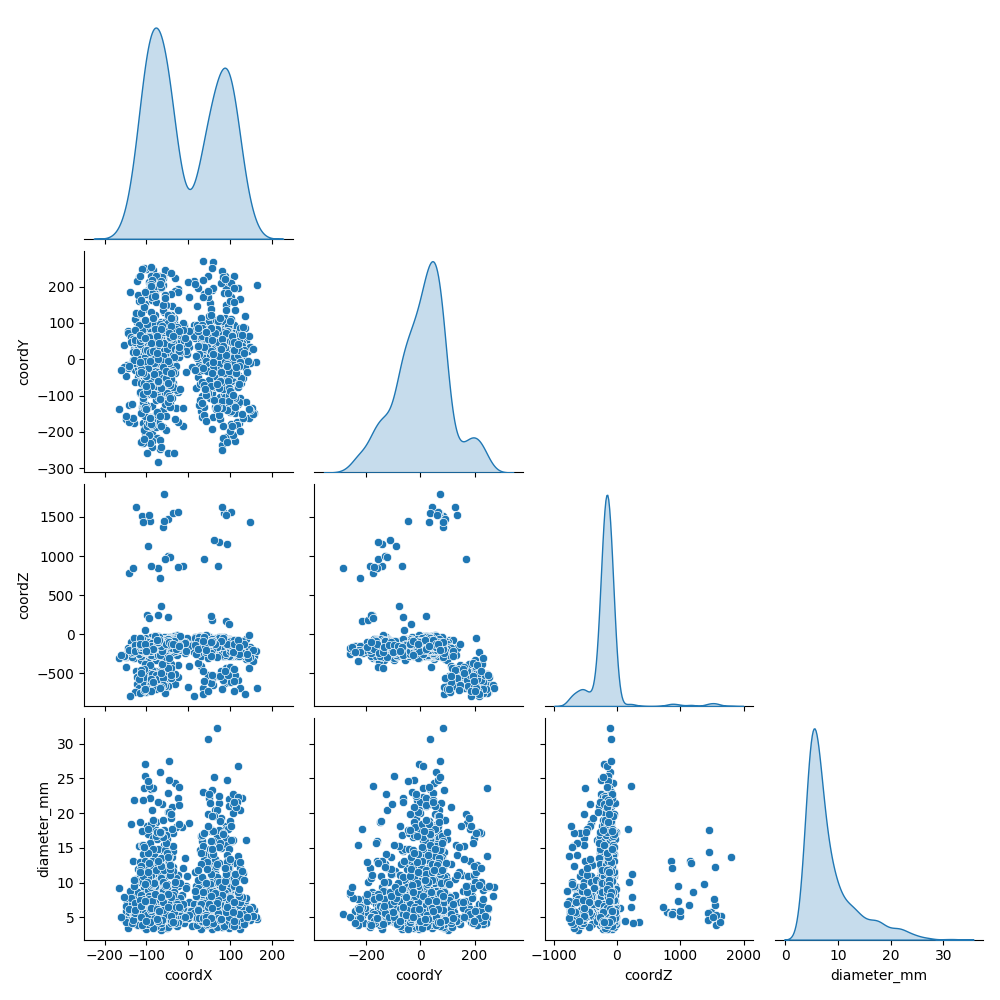

In [19]:
if __name__ == "__main__":
    pairplot_annotations(annotations)

### Visualizing the CT-scans:

In [20]:
def visualize_single_slice(volumeImage):
    # Create figure and adjust layout to make room for slider
    fig, (ax, ax_xray) = plt.subplots(1, 2, figsize=(16, 8))
    plt.subplots_adjust( right=0.8)

    # Initialize slice (middle slice)
    initial_slice = volumeImage.shape[0] // 2
    current_slice = initial_slice

    # Display initial slice (CT scan) on the left side
    im = ax.imshow(volumeImage[initial_slice], cmap="gray")
    ax.set_title(f"CT Scan Slice {initial_slice}")
    ax.axis("off")

    # Load your chest X-ray image
    xray_image_path = "Assets/chest.jpg"  # Replace with your actual chest X-ray image path
    xray_image = mpimg.imread(xray_image_path)
    height, width = xray_image.shape[:2]
    initial_line_h = height // 2 
    slices_nbr = volumeImage.shape[0] - 1
    line_slices = np.linspace(0, height, slices_nbr)

    # Set up X-ray image on the right side
    xray_im = ax_xray.imshow(xray_image, cmap="gray")
    ax_xray.set_title("Chest X-Ray")
    ax_xray.axis("off")
    
    # Add a horizontal line on the X-ray image indicating the current slice
    line = ax_xray.axhline(y=line_slices[current_slice], color="red", linestyle="--", linewidth=2)

    # Create vertical slider on the left side
    ax_slider = plt.axes([0.85, 0.26, 0.03, 0.47])  # [left, bottom, width, height]
    slice_slider = Slider(
        ax=ax_slider, 
        label="Slice Number", 
        valmin=1, 
        valmax=volumeImage.shape[0] - 1, 
        valinit=initial_slice, 
        valstep=1,
        orientation="vertical"
    )

    # Update function for slider
    def update(val):
        current_slice = int(slice_slider.val)
        im.set_data(volumeImage[current_slice])  # Update CT slice
        ax.set_title(f"CT Scan Slice {current_slice}")
        idx = int(slices_nbr - val+1)
        line.set_ydata([line_slices[idx]])  # Update the position of the horizontal line on the X-ray
        fig.canvas.draw_idle()

    # Register update function with slider
    slice_slider.on_changed(update)

    # Show the plot
    plt.show()

In [21]:
if __name__ == "__main__":
    numpyImage, numpyOrigin, numpySpacing = load_itk_image(os.path.join("Data/Luna/subset0", Data["subset0"]["CT_1"]))

In [22]:
print(numpySpacing)

[2.5        0.74218798 0.74218798]


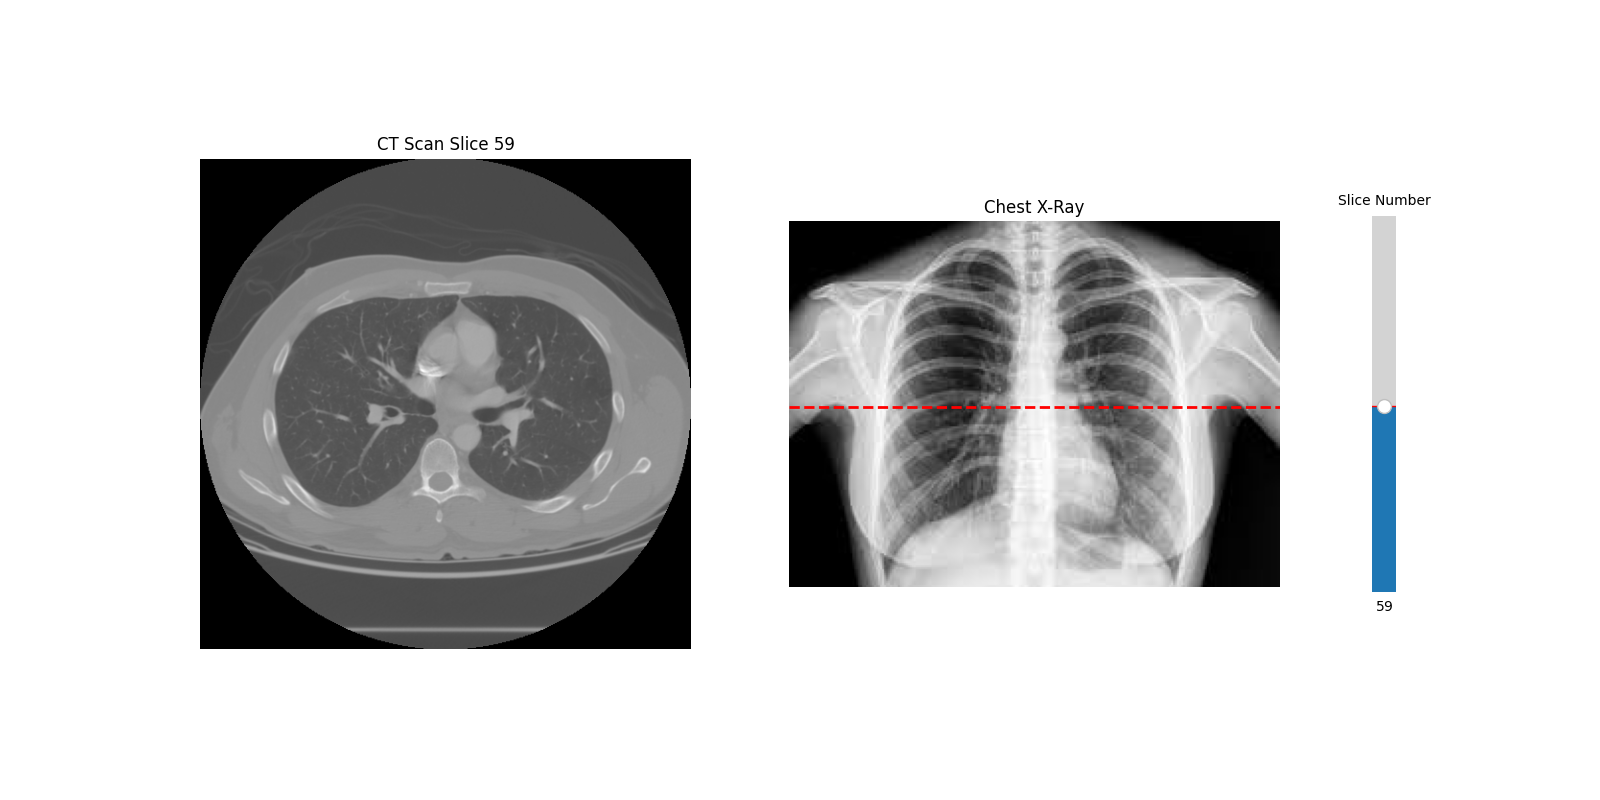

In [23]:
if __name__ == "__main__":
    visualize_single_slice(numpyImage)

# Data Preprocessing:

### Resize the CT-scans to the same size [1, 1, 1] spacing: (using Interpolation)

In [24]:
if __name__ == "__main__":
    print(numpyImage.shape)
    print(numpyOrigin)
    print(numpySpacing)

(119, 512, 512)
[-313.75 -190.   -182.5 ]
[2.5        0.74218798 0.74218798]


In [ ]:
def convert_world_to_voxel_coord(seriesuid, numpyOrigin, numpySpacing):
    # Filter the annotations for the specific seriesuid
    specific_annotation = annotations[annotations["seriesuid"] == seriesuid]
    
    # Extract and convert the coordinates for the specific seriesuid
    coordX = (specific_annotation["coordX"] - numpyOrigin[0]) / numpySpacing[0]
    coordY = (specific_annotation["coordY"] - numpyOrigin[1]) / numpySpacing[1]
    coordZ = (specific_annotation["coordZ"] - numpyOrigin[2]) / numpySpacing[2]

    print(coordX)
    print(coordY)
    print(coordZ)

    return coordX, coordY, coordZ

In [28]:
if __name__ == "__main__":
    convert_world_to_voxel_coord("1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860", numpyOrigin, numpySpacing)

0     74.020232
1    167.013460
Name: coordX, dtype: float64


In [ ]:
def resize_image(seriesuid, numpyImage, numpyOrigin, numpySpacing):
    RESIZE_SPACING = [1.0, 1.0, 1.0]
    resize_factor = numpySpacing / RESIZE_SPACING

    new_real_shape = numpyImage.shape * resize_factor
    new_shape = np.round(new_real_shape)

    real_resize = new_shape / numpyImage.shape

    new_volume = ndimage.zoom(numpyImage, zoom=real_resize)

    newOrigin = numpyOrigin * (RESIZE_SPACING / numpySpacing)

    image_annotations = None
    mask = annotations["seriesuid"] == seriesuid
    image_annotations = annotations[mask].copy()
    print(image_annotations)
    if image_annotations != None:
        newX, newY, newZ = convert_world_to_voxel_coord(numpyOrigin, numpySpacing)
        
    
    return new_volume, newOrigin, RESIZE_SPACING

In [ ]:
if __name__ == "__main__":
    resizedNumpyImage, newOrignn, newSpacing = resize_image("1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860", numpyImage, numpyOrigin, numpySpacing)

In [31]:
if __name__ == "__main__":
    print(resizedNumpyImage.shape)
    print(newOrignn)
    print(newSpacing)

(298, 380, 380)
[-125.5        -255.99983553 -245.89457886]
[1.0, 1.0, 1.0]


### Removing Outliers: Clipping to HU values [-1000(air), 400(soft tissue)]:

In [32]:
def clip_CT_scan(numpyImage):
    return np.clip(numpyImage, -1000, 400)

In [33]:
if __name__ == "__main__":
    newImage =  clip_CT_scan(resizedNumpyImage)

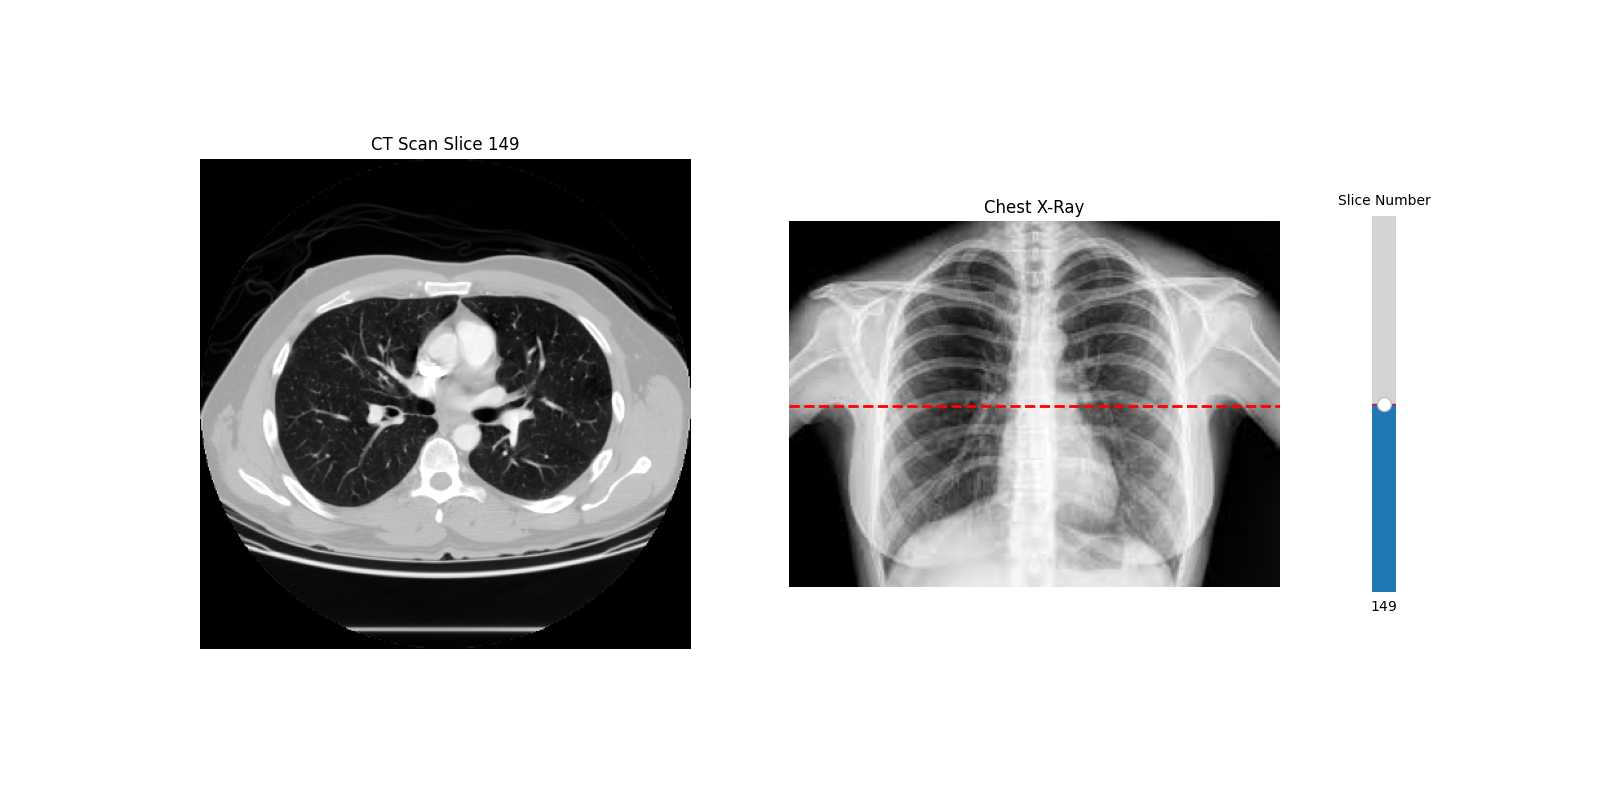

In [34]:
if __name__ == "__main__":
    visualize_single_slice(newImage)

In [35]:
def Min_Max_scaling(numpyImage):
    normalized_image = (numpyImage - (-1000)) / (400 - (-1000))

    return normalized_image

In [36]:
if __name__ == "__main__":
    normalizedVolume =  Min_Max_scaling(newImage)

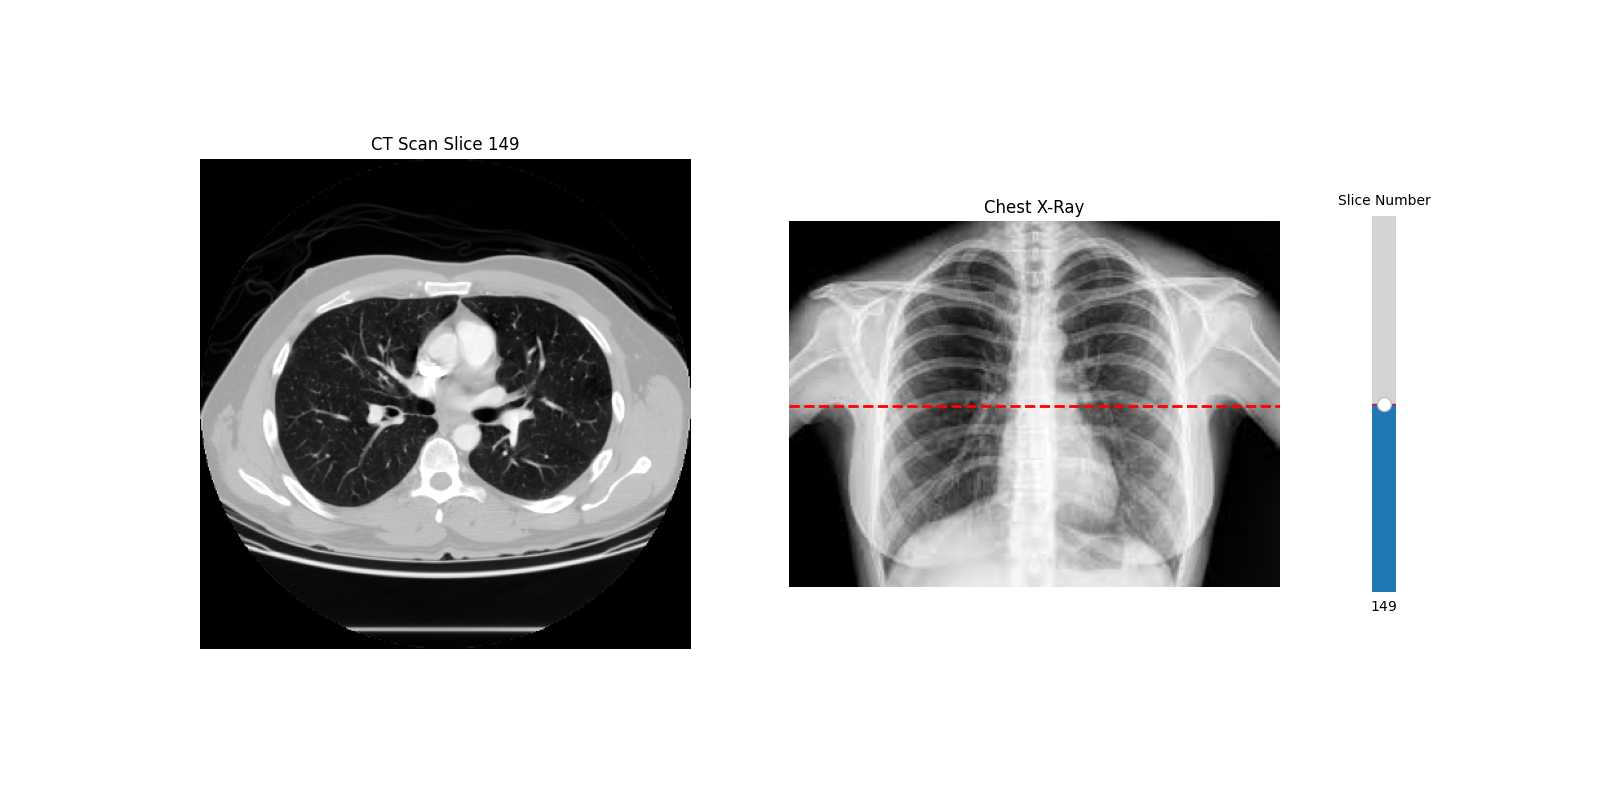

In [37]:
if __name__ == "__main__":
    visualize_single_slice(normalizedVolume)